In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import os, glob
import seaborn as sns
from scipy.optimize import curve_fit
plt.style.use("ggplot")
cm = 1/2.54

In [2]:
conff0 = glob.glob('data/ConfT5F0S**.txt')
conff0 = sorted(conff0)
conff_1 = glob.glob('data/ConfT5F-1S**.txt')
conff_1 = sorted(conff_1)
conff1 = glob.glob('data/ConfT5F+1S**.txt')
conff1 = sorted(conff1)

In [3]:
conff0

['data/ConfT5F0S21.txt',
 'data/ConfT5F0S22.txt',
 'data/ConfT5F0S23.txt',
 'data/ConfT5F0S24.txt',
 'data/ConfT5F0S25.txt']

In [4]:
conff_1

['data/ConfT5F-1S21.txt',
 'data/ConfT5F-1S22.txt',
 'data/ConfT5F-1S23.txt',
 'data/ConfT5F-1S24.txt',
 'data/ConfT5F-1S25.txt']

In [5]:
conff1

['data/ConfT5F+1S21.txt',
 'data/ConfT5F+1S22.txt',
 'data/ConfT5F+1S23.txt',
 'data/ConfT5F+1S24.txt',
 'data/ConfT5F+1S25.txt']

In [34]:
beads = 13; 
#jmp = 5 ; dt = 'dt05'; Dt = 0.05
#jmp = 10 ; dt = 'dt1'; Dt = 0.1
#jmp = 20 ; dt = 'dt2'; Dt = 0.2
#jmp = 30 ; dt = 'dt3'; Dt = 0.3
jmp = 50 ; dt = 'dt5'; Dt = 0.5

v0 = 7.0; v_1 = 7.7; v1 = 7.8

conf0 = []; conf_1 = []; conf1 = []; 
xy0 = []; xy_1 = []; xy1 = [];
xdiff0 = []; ydiff0 = []; 
xdiff_1 = []; ydiff_1 = [];
xdiff1 = []; ydiff1 = []; 
bf0 = []; bf_1 = []; bf1 = []

for i in conff0:
    _ = pd.read_csv(i, names=['t','x','y','z'], delim_whitespace=True)
    xy0_ = _[0::beads]
    xy0.append(xy0_)
    _ = xy0_[0::jmp]
    conf0.append(_)
    xdiff0.append(np.diff(_['x']))
    ydiff0.append(np.diff(_['y']))

for j in conff_1:
    _ = pd.read_csv(j, names=['t','x','y','z'], delim_whitespace=True)
    xy_1_ = _[0::beads]
    xy_1.append(xy_1_)
    _ = xy_1_[0::jmp]
    conf_1.append(_)
    xdiff_1.append(np.diff(_['x']))
    ydiff_1.append(np.diff(_['y']))
    
for j in conff1:
    _ = pd.read_csv(j, names=['t','x','y','z'], delim_whitespace=True)
    xy1_ = _[0::beads]
    xy1.append(xy1_)
    _ = xy1_[0::jmp]
    conf1.append(_)
    xdiff1.append(np.diff(_['x']))
    ydiff1.append(np.diff(_['y']))


In [54]:
conf0[0]

,t,x,y,z
0,0,3.000000,0.000000,1.250000e-02
650,5000000,5.508376,2.110361,5.821544e-03
1300,10000000,6.006305,5.441985,2.178498e-03
1950,15000000,2.995958,6.676840,4.124992e-03
2600,20000000,0.148982,5.919592,9.975003e-03
3250,25000000,0.776309,2.695799,3.894213e-03
3900,30000000,-1.232285,0.160962,1.353294e-02
4550,35000000,-2.912695,-2.716135,4.389012e-07
5200,40000000,-4.326671,-5.793926,5.828010e-05
5850,45000000,-6.512297,-8.266836,2.985166e-06


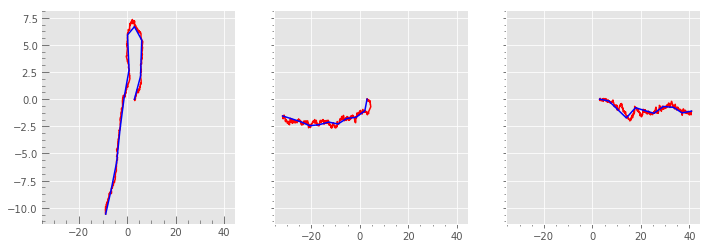

In [52]:
fig, ax = plt.subplots(1,3, figsize=(30*cm, 10*cm), sharex = True, sharey = True)

ax[0].plot(xy0[0]['x'], xy0[0]['y'], color='red')
ax[0].plot(conf0[0]['x'], conf0[0]['y'], color='blue')
ax[0].minorticks_on()
ax[0].tick_params('both', direction='in', length=8, which='major')
ax[0].tick_params('both', direction='in', length=4, which='minor')
ax[0].xlabel('X($\mu m$)')
ax[0].xlabel('X($\mu m$)')

ax[1].plot(xy_1[0]['x'], xy_1[0]['y'], color='red')
ax[1].plot(conf_1[0]['x'], conf_1[0]['y'], color='blue')

ax[2].plot(xy1[0]['x'], xy1[0]['y'], color='red')
ax[2].plot(conf1[0]['x'], conf1[0]['y'], color='blue')

plt.show()

In [7]:
ubx0 = []; uby0 = []
ubx_1 = []; uby_1 = []
ubx1 = []; uby1 = []

for i in range(len(xdiff0)):
    b0 = np.sqrt(xdiff0[i]**2 + ydiff0[i]**2)
    ubx0.append(xdiff0[i]/b0)
    uby0.append(ydiff0[i]/b0)

for j in range(len(xdiff_1)):
    b_1 = np.sqrt(xdiff_1[j]**2 + ydiff_1[j]**2)
    ubx_1.append(xdiff_1[j]/b_1)
    uby_1.append(ydiff_1[j]/b_1)    
    
for j in range(len(xdiff1)):
    b1 = np.sqrt(xdiff1[j]**2 + ydiff1[j]**2)
    ubx1.append(xdiff1[j]/b1)
    uby1.append(ydiff1[j]/b1)

In [8]:
ub0 = []; ub_1 = []; ub1 = []

for i in range(len(ubx0)):
    ub0.append(pd.DataFrame({'ubx':ubx0[i], 'uby':uby0[i]}))
    
for j in range(len(ubx_1)):
    ub_1.append(pd.DataFrame({'ubx':ubx_1[j], 'uby':uby_1[j]}))
    
for j in range(len(ubx1)):
    ub1.append(pd.DataFrame({'ubx':ubx1[j], 'uby':uby1[j]}))

In [9]:
_ = []; ds0 = []; dsm0 = []; s0 = []; c = 0; ds0_ = []; dsm_ = []; s_ = []

# try:
#     os.remove('ds_ub_status.txt')
# except:
#     print("'ds_ub_status.txt' does not exist.")
    
for h in range(len(ub0)):
    for i in range(len(ub0[h])-1):
#         print("Ds = %s"%i, file=open('ds_ub_status.txt','a'))
        for j in range(len(ub0[h])-1):
            try:
                _.append(np.dot(ub0[h].loc[j].values,ub0[h].loc[j+i].values))
#                 print("Ub%s.Ub%s"%(j,j+i), file=open('ds_ub_status.txt','a'))
            except:
                pass #print("No: Ub%s.Ub%s"%(j,j+i))
        ds0_.append(_) # not necessary to save or is it?
        dsm_.append(np.mean(_))
        s_.append(c)
        _ = [] # empty this bucket
        c+=1
    s0.append(s_)
    dsm0.append(dsm_)
    ds0.append(ds0_)
    c = 0; ds0_ = []; dsm_ = []; s_ = [] # reset stuff

s0 = np.array(s0)
#ds0 = np.array(ds0)
dsm0 = np.array(dsm0)

In [10]:
_ = []; ds_1 = []; dsm_1 = []; s_1 = []; c = 0; ds_1_ = []; dsm_ = []; s_ = []

# try:
#     os.remove('ds_ub_status.txt')
# except:
#     print("'ds_ub_status.txt' does not exist.")
    
for h in range(len(ub_1)):
    for i in range(len(ub_1[h])-1):
#         print("Ds = %s"%i, file=open('ds_ub_status.txt','a'))
        for j in range(len(ub_1[h])-1):
            try:
                _.append(np.dot(ub_1[h].loc[j].values,ub_1[h].loc[j+i].values))
#                 print("Ub%s.Ub%s"%(j,j+i), file=open('ds_ub_status.txt','a'))
            except:
                pass #print("No: Ub%s.Ub%s"%(j,j+i))
        ds_1_.append(_) # not necessary to save
        dsm_.append(np.mean(_))
        s_.append(c)
        _ = [] # empty this bucket
        c+=1
    s_1.append(s_)
    dsm_1.append(dsm_)
    ds_1.append(ds_1_)
    c = 0; ds_1_ = []; dsm_ = []; s_ = [] # reset stuff

s_1 = np.array(s_1)
#ds_1 = np.array(ds_1)
dsm_1 = np.array(dsm_1)

In [11]:
_ = []; ds1 = []; dsm1 = []; s1 = []; c = 0; ds1_ = []; dsm_ = []; s_ = []

# try:
#     os.remove('ds_ub_status.txt')
# except:
#     print("'ds_ub_status.txt' does not exist.")
    
for h in range(len(ub1)):
    for i in range(len(ub1[h])-1):
#         print("Ds = %s"%i, file=open('ds_ub_status.txt','a'))
        for j in range(len(ub1[h])-1):
            try:
                _.append(np.dot(ub1[h].loc[j].values,ub1[h].loc[j+i].values))
#                 print("Ub%s.Ub%s"%(j,j+i), file=open('ds_ub_status.txt','a'))
            except:
                pass #print("No: Ub%s.Ub%s"%(j,j+i))
        ds1_.append(_) # not necessary to save
        dsm_.append(np.mean(_))
        s_.append(c)
        _ = [] # empty this bucket
        c+=1
    s1.append(s_)
    dsm1.append(dsm_)
    ds1.append(ds1_)
    c = 0; ds1_ = []; dsm_ = []; s_ = [] # reset stuff

s1 = np.array(s1)
#ds1 = np.array(ds1)
dsm1 = np.array(dsm1)

In [53]:
s0

array([[0, 1, 2, 3, 4, 5, 6, 7, 8],
       [0, 1, 2, 3, 4, 5, 6, 7, 8],
       [0, 1, 2, 3, 4, 5, 6, 7, 8],
       [0, 1, 2, 3, 4, 5, 6, 7, 8],
       [0, 1, 2, 3, 4, 5, 6, 7, 8]])

In [12]:
try:
    os.remove('data/s0_m'+dt+'.csv')
    os.remove('data/dsm0_m'+dt+'.csv')
    os.remove('data/s_1_m'+dt+'.csv')
    os.remove('data/dsm_1_m'+dt+'.csv')
    os.remove('data/s1_m'+dt+'.csv')
    os.remove('data/dsm1_m'+dt+'.csv')
except:
    print("'xxx.csv' does not exist.")

dfs0 = pd.DataFrame({'s00':s0[0], 's01':s0[1], 's02':s0[2], 's03':s0[3]})
dfdsm0 = pd.DataFrame({'dsm00':dsm0[0], 'dsm01':dsm0[1], 'dsm02':dsm0[2], 'dsm03':dsm0[3]})

s0_m = dfs0.mean(axis=1)*v0*Dt
s0_m.to_csv('data/s0_m'+dt+'.csv', index=False)
dsm0_m = dfdsm0.mean(axis=1)
dsm0_m.to_csv('data/dsm0_m'+dt+'.csv', index=False)
#=========================================================
dfs_1 = pd.DataFrame({'s_10':s_1[0], 's_11':s_1[1], 's_12':s_1[2], 's_13':s_1[3]})
dfdsm_1 = pd.DataFrame({'dsm_10':dsm_1[0], 'dsm_11':dsm_1[1], 'dsm_12':dsm_1[2], 'dsm_13':dsm_1[3]})

s_1_m = dfs_1.mean(axis=1)*v_1*Dt
s_1_m.to_csv('data/s_1_m'+dt+'.csv', index=False)
dsm_1_m = dfdsm_1.mean(axis=1)
dsm_1_m.to_csv('data/dsm_1_m'+dt+'.csv', index=False)
#=========================================================
dfs1 = pd.DataFrame({'s10':s1[0], 's11':s1[1], 's12':s1[2], 's13':s1[3]})
dfdsm1 = pd.DataFrame({'dsm10':dsm1[0], 'dsm11':dsm1[1], 'dsm12':dsm1[2], 'dsm13':dsm1[3]})

s1_m = dfs1.mean(axis=1)*v1*Dt
s1_m.to_csv('data/s1_m'+dt+'.csv', index=False)
dsm1_m = dfdsm1.mean(axis=1)
dsm1_m.to_csv('data/dsm1_m'+dt+'.csv', index=False)

/home/nitta/.local/lib/python3.5/site-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


In [13]:
s0_ = glob.glob('data/s0_mdt**.csv')
s0_ = sorted(s0_)
s_1_ = glob.glob('data/s_1_mdt**.csv')
s_1_ = sorted(s_1_)
s1_ = glob.glob('data/s1_mdt**.csv')
s1_ = sorted(s1_)
#=========================================================

dsm0_ = glob.glob('data/dsm0_mdt**.csv')
dsm0_ = sorted(dsm0_)
dsm_1_ = glob.glob('data/dsm_1_mdt**.csv')
dsm_1_ = sorted(dsm_1_)
dsm1_ = glob.glob('data/dsm1_mdt**.csv')
dsm1_ = sorted(dsm1_)

In [14]:
s_1_

['data/s_1_mdt5.csv']

In [15]:
s0m = []; s_1m = []; s1m = []; 
dsm0 = []; dsm_1 = []; dsm1 = []

for i in s0_:
    _ = pd.read_csv(i, names=['s0m'])
    s0m.append(_)

for j in s_1_:
    _ = pd.read_csv(j, names=['s_1m'])
    s_1m.append(_)    
    
for j in s1_:
    _ = pd.read_csv(j, names=['s1m'])
    s1m.append(_)
#=========================================================
    
for k in dsm0_:
    _ = pd.read_csv(k, names=['dsm0'])
    dsm0.append(_)

for l in dsm_1_:
    _ = pd.read_csv(l, names=['dsm_1'])
    dsm_1.append(_)    
    
for l in dsm1_:
    _ = pd.read_csv(l, names=['dsm1'])
    dsm1.append(_)

In [16]:
s1m[0]

,s1m
0,0.0
1,3.9
2,7.8
3,11.7
4,15.6
5,19.5
6,23.4
7,27.3
8,31.2


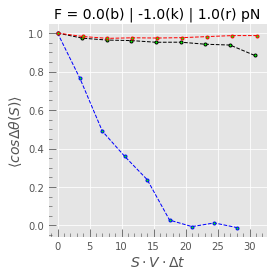

In [17]:
fig, ax = plt.subplots(1,1, figsize=(10*cm,10*cm))

dts = [0.05,0.1,0.2,0.3,0.5]; c=4

# for i in range(len(s0m)):
#     ax.plot(s0m[i],dsm0[i], marker='o', markersize=3, ls='--', lw=1, markerfacecolor='lime', label=r'$\Delta t = %.2f sec.$'%dts[c])
#     #c+=1

ax.plot(s0m[0],dsm0[0], marker='o', markersize=3, ls='--', lw=1, color='blue', markerfacecolor='lime')#, label=r'$\Delta t = %.2f sec.$'%dts[c])
ax.plot(s_1m[0],dsm_1[0], marker='o', markersize=3, ls='--', lw=1, color='black', markerfacecolor='lime')
ax.plot(s1m[0],dsm1[0], marker='o', markersize=3, ls='--', lw=1, color='red', markerfacecolor='lime')

ax.minorticks_on()
ax.tick_params('both', direction='in', length=8, which='major')
ax.tick_params('both', direction='in', length=4, which='minor')

ax.set_xlabel(r'$S \cdot V \cdot \Delta t$', fontsize=14)
ax.set_ylabel(r'$\langle cos \Delta \theta (S) \rangle$', fontsize=14)
ax.set_title('F = 0.0(b) | -1.0(k) | 1.0(r) pN', fontsize=14)
#plt.legend()

#plt.savefig('fig/LpAllT5.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [18]:
x0_ =  s0m[0]['s0m']#[:-3]; 
y0_ =  dsm0[0]['dsm0']#[:-3]

def func0(x0_,Lp0):
    return np.exp(-x0_/(2*Lp0))

popt0, pcov0 = curve_fit(func0, x0_, y0_)
#=========================================================

x_1_ =  s_1m[0]['s_1m']#[:-3]; 
y_1_ =  dsm_1[0]['dsm_1']#[:-3]

def func_1(x_1_,Lp_1):
    return np.exp(-x_1_/(2*Lp_1))

popt_1, pcov_1 = curve_fit(func_1, x_1_, y_1_)
#=========================================================

x1_ =  s1m[0]['s1m']#[:-3]; 
y1_ =  dsm1[0]['dsm1']#[:-3]

def func1(x1_,Lp1):
    return np.exp(-x1_/(2*Lp1))

popt1, pcov1 = curve_fit(func1, x1_, y1_)

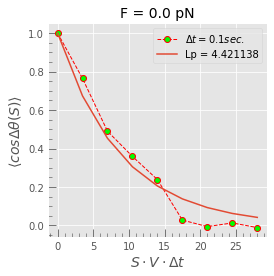

In [19]:
fig, ax = plt.subplots(1,1, figsize=(10*cm,10*cm))

ax.plot(x0_,y0_, marker='o', c='r', ls='--', lw=1, markerfacecolor='lime')#, label=r'$\Delta t = 0.1 sec.$')
ax.plot(x0_, func0(x0_,*popt0), label='Lp = %s'%np.round(popt0[0],6))

ax.minorticks_on()
ax.tick_params('both', direction='in', length=8, which='major')
ax.tick_params('both', direction='in', length=4, which='minor')

ax.set_xlabel(r'$S \cdot V \cdot \Delta t$', fontsize=14)
ax.set_ylabel(r'$\langle cos \Delta \theta (S) \rangle$', fontsize=14)
ax.set_title('F = 0.0 pN', fontsize=14)
plt.legend()

#plt.savefig('fig/LpT5F0.pdf', format='pdf', bbox_inches='tight')
plt.show()

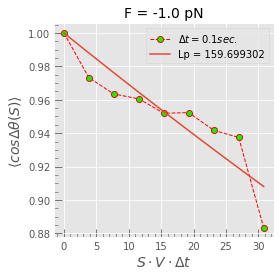

In [20]:
fig, ax = plt.subplots(1,1, figsize=(10*cm,10*cm))

ax.plot(x_1_,y_1_, marker='o', c='r', ls='--', lw=1, markerfacecolor='lime')#, label=r'$\Delta t = 0.1 sec.$')
ax.plot(x_1_, func_1(x_1_,*popt_1), label='Lp = %s'%np.round(popt_1[0],6))

ax.minorticks_on()
ax.tick_params('both', direction='in', length=8, which='major')
ax.tick_params('both', direction='in', length=4, which='minor')

ax.set_xlabel(r'$S \cdot V \cdot \Delta t$', fontsize=14)
ax.set_ylabel(r'$\langle cos \Delta \theta (S) \rangle$', fontsize=14)
ax.set_title('F = -1.0 pN', fontsize=14)
plt.legend()

#plt.savefig('fig/LpT5F-1.pdf', format='pdf', bbox_inches='tight')
plt.show()

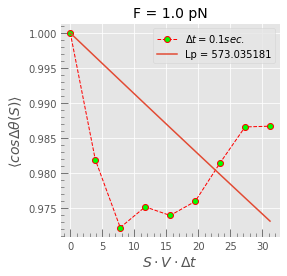

In [21]:
fig, ax = plt.subplots(1,1, figsize=(10*cm,10*cm))

ax.plot(x1_,y1_, marker='o', c='r', ls='--', lw=1, markerfacecolor='lime')#, label=r'$\Delta t = 0.1 sec.$')
ax.plot(x1_, func1(x1_,*popt1), label='Lp = %s'%np.round(popt1[0],6))

ax.minorticks_on()
ax.tick_params('both', direction='in', length=8, which='major')
ax.tick_params('both', direction='in', length=4, which='minor')

ax.set_xlabel(r'$S \cdot V \cdot \Delta t$', fontsize=14)
ax.set_ylabel(r'$\langle cos \Delta \theta (S) \rangle$', fontsize=14)
ax.set_title('F = 1.0 pN', fontsize=14)
plt.legend()

#plt.savefig('fig/LpT5F1.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [22]:
#i = 3; 
x = s0[0] #m[i]['s0m']
y = dsm0[0] #[i]['dsm0']
y = np.log(y)
# y = y[~np.isnan(y)]
# x = x[:y.shape[0]]
x = x[:-3]
y = y['dsm0'][:-3]

/home/nitta/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


In [23]:
x

array([0, 1, 2, 3, 4, 5])

In [24]:
def func(x,Lp):
    return 1*(-x/(2*Lp))
popt, pcov = curve_fit(func, x, y)


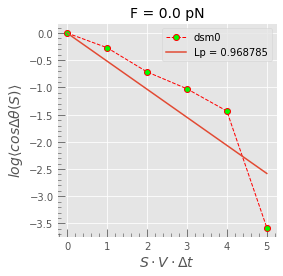

In [25]:
fig, ax = plt.subplots(1,1, figsize=(10*cm,10*cm), sharey=True)

ax.plot(x,y, marker='o', c='r', ls='--', lw=1, markerfacecolor='lime')#, label=r'$\Delta t = 0.1 sec.$')
ax.plot(x, func(x,*popt), label='Lp = %s'%np.round(popt[0],6))

ax.minorticks_on()
ax.tick_params('both', direction='in', length=8, which='major')
ax.tick_params('both', direction='in', length=4, which='minor')

ax.set_xlabel(r'$S \cdot V \cdot \Delta t$', fontsize=14)
ax.set_ylabel(r'$log \langle cos \Delta \theta (S) \rangle$', fontsize=14)
ax.set_title('F = 0.0 pN', fontsize=14)
ax.legend()

#plt.savefig('fig/LpT5F0log.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [26]:
#i = 3; 
x = s_1[0] #m[i]['s0m']
y = dsm_1[0] #[i]['dsm0']
y = np.log(y)
# y = y[~np.isnan(y)]
# x = x[:y.shape[0]]
x = x#[:-3]
y = y['dsm_1']#[:-3]

In [27]:
y

0    0.000000
1   -0.027130
2   -0.037223
3   -0.040216
4   -0.049257
5   -0.048860
6   -0.060047
7   -0.064578
8   -0.123897
Name: dsm_1, dtype: float64

In [28]:
def func(x,Lp):
    return 1*(-x/(2*Lp))
popt, pcov = curve_fit(func, x, y)


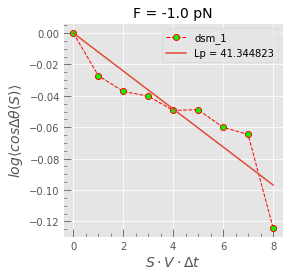

In [29]:
fig, ax = plt.subplots(1,1, figsize=(10*cm,10*cm), sharey=True)

ax.plot(x,y, marker='o', c='r', ls='--', lw=1, markerfacecolor='lime')#, label=r'$\Delta t = 0.1 sec.$')
ax.plot(x, func(x,*popt), label='Lp = %s'%np.round(popt[0],6))

ax.minorticks_on()
ax.tick_params('both', direction='in', length=8, which='major')
ax.tick_params('both', direction='in', length=4, which='minor')

ax.set_xlabel(r'$S \cdot V \cdot \Delta t$', fontsize=14)
ax.set_ylabel(r'$log \langle cos \Delta \theta (S) \rangle$', fontsize=14)
ax.set_title('F = -1.0 pN', fontsize=14)
ax.legend()

#plt.savefig('fig/LpT5F-1log.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [30]:
#i = 3; 
x = s1[0] #m[i]['s0m']
y = dsm1[0] #[i]['dsm0']
y = np.log(y)
# y = y[~np.isnan(y)]
# x = x[:y.shape[0]]
x = x#[:-3]
y = y['dsm1']#[:-3]

In [31]:
y

0    0.000000
1   -0.018231
2   -0.028172
3   -0.025131
4   -0.026395
5   -0.024342
6   -0.018713
7   -0.013501
8   -0.013391
Name: dsm1, dtype: float64

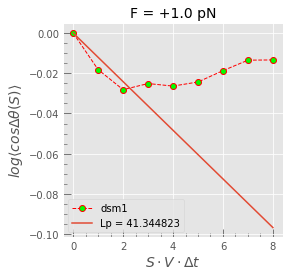

In [32]:
fig, ax = plt.subplots(1,1, figsize=(10*cm,10*cm), sharey=True)

ax.plot(x,y, marker='o', c='r', ls='--', lw=1, markerfacecolor='lime')#, label=r'$\Delta t = 0.1 sec.$')
ax.plot(x, func(x,*popt), label='Lp = %s'%np.round(popt[0],6))

ax.minorticks_on()
ax.tick_params('both', direction='in', length=8, which='major')
ax.tick_params('both', direction='in', length=4, which='minor')

ax.set_xlabel(r'$S \cdot V \cdot \Delta t$', fontsize=14)
ax.set_ylabel(r'$log \langle cos \Delta \theta (S) \rangle$', fontsize=14)
ax.set_title('F = +1.0 pN', fontsize=14)
ax.legend()

#plt.savefig('fig/LpT5F1log.pdf', format='pdf', bbox_inches='tight')
plt.show()